In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from chemicals import Antoine, CAS_from_any
from chemicals.vapor_pressure import Psat_data_AntoinePoling

In [2]:
def remove_frame(ax, sides=["top", "left", "right"]):
    for side in sides:
        ax_side = ax.spines[side]
        ax_side.set_visible(False)

In [3]:
CAS_water = CAS_from_any("Water")
antoine_coefficients = Psat_data_AntoinePoling.loc[CAS_water]
_, A, B, C, *_ = antoine_coefficients
T = 373.15
Antoine(T, A, B, C)

101047.25357066638

In [11]:
np.log(1000)

6.907755278982137

In [22]:
15.301/2.302585+6.908

13.553140135977607

In [30]:
solvents = [
    "tert-amyl alcohol",
    "toluene",
    "tetrahydrofuran",
    "cyclopentyl methyl ether",
    "Dimethyl sulfoxide", 
    "acetonitrile",
    "chloroform"
]

nist_parameters = {
    "Dimethyl sulfoxide": ("", 4.49107+5, 1807.002	, -60.995, ""), 
    "acetonitrile": ("", 4.27873+5,1355.374, -37.853, ""),
#     "cyclopentyl methyl ether": ("", 15.301/2.302585+6.908, 3798.883/2.302585, -23.528, "")
    # Used this paper but their numbers seem off: https://pubs.acs.org/doi/10.1021/acs.jced.8b00855
}

def calculate_vapor_pressures_chemicals(name: str, temps: list) -> list:
    cas_number = CAS_from_any(name)
    try:
        antoine_coefficients = Psat_data_AntoinePoling.loc[cas_number]
        _, A, B, C, *_ = antoine_coefficients
        return [Antoine(T, A, B, C) for T in temps]
    except KeyError:
        antoine_coefficients = nist_parameters.get(name)
        if antoine_coefficients is None:
            return []
        _, A, B, C, *_ = antoine_coefficients
        return [Antoine(T, A, B, C, 10) for T in temps]

        

temperatures = np.array([T+273.15 for T in np.arange(100, 250,10)])

vapor_presssures = {
    solvent: calculate_vapor_pressures_chemicals(solvent, temperatures)
    for solvent in solvents
}

Text(0.5, 0.98, 'Borrowing Hydrogen Solvent Vapor Pressures')

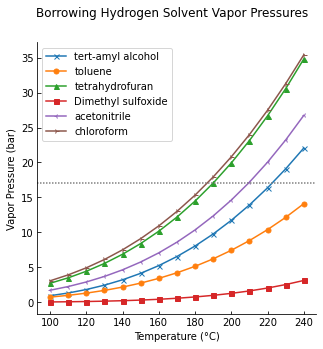

In [32]:
fig, ax = plt.subplots(1, figsize=(5,5))
temperatures_deg_c = temperatures - 273.15
markers = ["x", "o", "^", "*", "s", "3", "4"]
for i, (solvent, pvaps) in enumerate(vapor_presssures.items()):
    if len(pvaps) >0:
        pvaps = np.array(pvaps) * 1e-5
        ax.plot(temperatures_deg_c, pvaps, label=solvent, marker=markers[i], markersize=5)
ax.legend()
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Vapor Pressure (bar)")
remove_frame(ax, sides=["top", "right"])
ax.tick_params(direction="in")
ax.axhline(17, dashes=[1, 1], c="grey")
fig.suptitle("Borrowing Hydrogen Solvent Vapor Pressures")
# fig.savefig("../figures/solvent_vapor_pressures.png", dpi=300)
